In [195]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [196]:
import numpy as np
import pandas as pd

In [197]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [198]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [199]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [200]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [201]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [202]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [114]:
# Perform a query to retrieve the data and precipitation scores

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)


# Retrieve the last 12 months of precipitation data-take average precipitation for multiple values in one day

precip_lastyr = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_year).\
                    group_by(Measurement.date).all()
precip_lastyr

('2017-08-23',)
2016-08-23


[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [120]:
# Save the query results as a Pandas DataFrame and set the index to the date column


precip_lastyr_df = pd.DataFrame(precip_lastyr, columns=['Date', 'Daily Avg. Precipitation'])
precip_lastyr_df.set_index('Date', inplace=True)
precip_lastyr_df.head()

,Daily Avg. Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


<function matplotlib.pyplot.show(*args, **kw)>

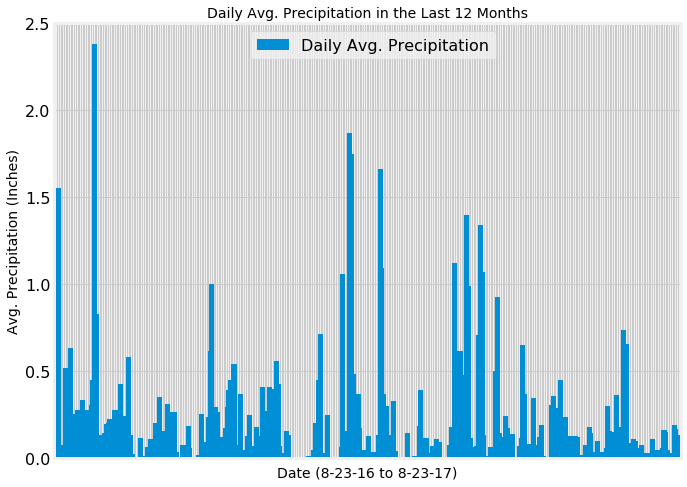

In [147]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = precip_lastyr_df.plot(kind='bar', width=3, figsize=(10,8))
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Daily Avg. Precipitation in the Last 12 Months", size=14)
plt.ylabel("Avg. Precipitation (Inches)", size=14)
plt.xlabel("Date (8-23-16 to 8-23-17)", size=14)
plt.show

In [149]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_lastyr_df.describe()


,Daily Avg. Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [153]:
# Design a query to show how many stations are available in this dataset?

locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [154]:
# What are the most active stations? (i.e. what stations have the most rows)?

stations_by_activity = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
stations_by_activity



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [155]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

lowesttemp_station = stations_by_activity[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == lowesttemp_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [163]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

observation_ct = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == lowesttemp_station).\
                filter(Measurement.date >= last_year).all()
total_obs_df = pd.DataFrame(observation_ct)
total_obs_df.set_index('station', inplace=True)
total_obs_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


<function matplotlib.pyplot.show(*args, **kw)>

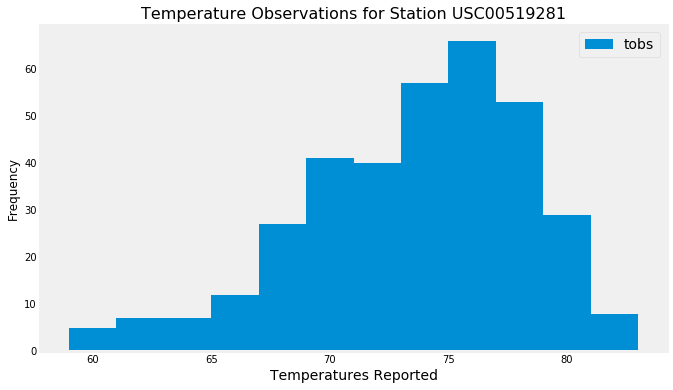

In [169]:
tobs_df.plot.hist(by='station', bins=12, figsize=(10,6))
plt.grid()
plt.title("Temperature Observations for Station " + lowesttemp_station, fontsize=16)
plt.xlabel("Temperatures Reported", fontsize=14)
plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.show